In [2]:
import pandas as pd
from deep_translator import GoogleTranslator
from langdetect import detect
from tqdm import tqdm
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('goodreads_scraper/books_desc.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               9723 non-null   int64  
 1   book_title            9723 non-null   object 
 2   isbn                  9723 non-null   object 
 3   author                9723 non-null   object 
 4   num_pages             9635 non-null   float64
 5   description           9723 non-null   object 
 6   cover_image_uri       9723 non-null   object 
 7   series_length         5062 non-null   float64
 8   year_first_published  9712 non-null   float64
 9   average_rating        9723 non-null   float64
 10  rating_distribution   9723 non-null   object 
 11  tags                  9723 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 911.7+ KB


In [10]:
data['language'] = data['description'].apply(lambda x: detect(x) if isinstance(x, str) else 'unknown')
language_counts = data['language'].value_counts()

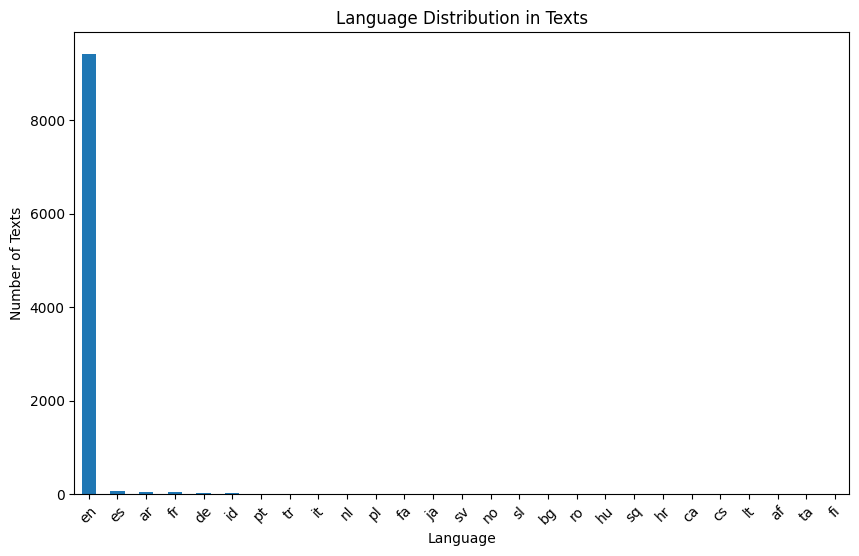

In [11]:
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Language Distribution in Texts')
plt.xlabel('Language')
plt.ylabel('Number of Texts')
plt.xticks(rotation=45)
plt.show()

In [12]:
for column in data.columns:
    print(column + ': ' + str(len(data[data[column] == ''])))

book_id: 0
book_title: 0
isbn: 0
author: 0
num_pages: 0
description: 0
cover_image_uri: 0
series_length: 0
year_first_published: 0
average_rating: 0
rating_distribution: 0


In [7]:
tqdm.pandas()

def translate_to_czech(text):
    try:
        detected_lang = detect(text)
        if detected_lang == 'cs':
            return text
        else:
            translator = GoogleTranslator(source='auto', target='cs')
            return translator.translate(text)
    except Exception as e:
        return f"Error: {e}"

In [7]:
data['desc_cs'] = data['description'].progress_apply(translate_to_czech)

  1%|          | 115/9962 [01:31<2:10:47,  1.25it/s]


KeyboardInterrupt: 

In [9]:
translate_to_czech(data.loc[0, 'description'])

'Mohl byste přežít sami ve volné přírodě, s každým ven, abyste se ujistili, že nežijete, abyste viděli ráno? V troskách místa, které se kdysi známé jako Severní Amerika leží, leží národ Panem, zářící kapitol obklopený dvanácti odlehlými okresy. Capitol je drsný a krutý a udržuje okresy ve frontě tím, že je nutí všechny, aby poslali jednoho chlapce a jednu dívku mezi dvanácti a osmnácti věky, aby se zúčastnili každoročních hladovců, boj o smrt v živé televizi. Šestnáctiletá Katniss Everdeen, která žije sama se svou matkou a mladší sestrou, to považuje za trest smrti, když vstoupí vpřed, aby zaujala místo své sestry ve hrách. Ale Katniss byla předtím téměř mrtvá - a přežití je pro ni druhou povahou. Aniž by to opravdu znamenalo, stane se uchazečem. Pokud však má vyhrát, bude muset začít rozhodovat o přežití na váze proti lidskosti a životu proti lásce.'

In [13]:
data = data[data['description'].notna()]
data.to_csv('goodreads_scraper/books_desc.csv', index=False)
